In [12]:
#必要なライブラリのインポート
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from sklearn import datasets
from sklearn.model_selection import ShuffleSplit #ShuffleSplitクラスの呼び出し
from sklearn import svm, metrics #svmとmetricsを呼び出す
from sklearn.metrics import plot_confusion_matrix #混同行列の呼び出し
import matplotlib.pyplot as plt #matplotlibの呼び出し
from sklearn.model_selection import train_test_split # train_test_splitの読み込み
from sklearn.ensemble import RandomForestClassifier #ランダムフォレストを使うためのライブラリ
from sklearn.model_selection import LeaveOneOut #交差検証(LeaveOneOut)を使うためのライブラリ
from sklearn.model_selection import cross_val_score #交差検証に必要なライブラリ

In [13]:
#emotion_labelデータの読みこみ

data1_a_label = pd.read_csv('feature/emotion_label/label_datetime/emotion_A_20201111_1_datetime.csv')
data1_b_label = pd.read_csv('feature/emotion_label/label_datetime/emotion_B_20201111_1_datetime.csv')
data1_c_label = pd.read_csv('feature/emotion_label/label_datetime/emotion_C_20201111_1_datetime.csv')
data1_d_label = pd.read_csv('feature/emotion_label/label_datetime/emotion_D_20201111_1_datetime.csv')
data2_a_label = pd.read_csv('feature/emotion_label/label_datetime/emotion_A_20201111_2_datetime.csv')
data2_b_label = pd.read_csv('feature/emotion_label/label_datetime/emotion_B_20201111_2_datetime.csv')
data2_c_label = pd.read_csv('feature/emotion_label/label_datetime/emotion_C_20201111_2_datetime.csv')
data2_d_label = pd.read_csv('feature/emotion_label/label_datetime/emotion_D_20201111_2_datetime.csv')

#feature_data(特徴量データーセット)の読みこみ
data1_a_record_all_feature = pd.read_csv('feature/feature_record/data1_a_record_all_feature_kai.csv')
data1_b_record_all_feature = pd.read_csv('feature/feature_record/data1_b_record_all_feature_kai.csv')
data1_c_record_all_feature = pd.read_csv('feature/feature_record/data1_c_record_all_feature_kai.csv')
data1_d_record_all_feature = pd.read_csv('feature/feature_record/data1_d_record_all_feature_kai.csv')

data2_a_record_all_feature = pd.read_csv('feature/feature_record/data2_a_record_all_feature_kai.csv')
data2_b_record_all_feature = pd.read_csv('feature/feature_record/data2_b_record_all_feature_kai.csv')
data2_c_record_all_feature = pd.read_csv('feature/feature_record/data2_c_record_all_feature_kai.csv')
data2_d_record_all_feature = pd.read_csv('feature/feature_record/data2_d_record_all_feature_kai.csv')

#確認
display(data1_a_record_all_feature)
display(data1_a_label)

,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,accz_var,gyrx_var,...,accx_min,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak
0,9984.935833,-713.331667,-1164.724167,203.115000,353.302500,256.370833,54541.043383,1.775498e+06,1.552083e+06,4.099190e+05,...,9012,-3279,-3188,-2049,-2468,-1074,5.669599,104.478611,0.195503,615.363782
1,9927.153266,-1382.432161,-651.786432,-192.315745,-94.364322,-148.935511,77180.520061,1.815885e+06,2.357170e+06,8.550140e+05,...,8803,-3279,-5263,-3818,-3279,-1409,3.519062,81.523975,0.195503,566.515280
2,10051.624167,538.305000,-1690.876667,117.219167,63.925833,-72.803333,292375.071249,1.298704e+05,3.211976e+05,3.797804e+05,...,4567,-928,-4257,-3092,-10267,-1312,4.301075,89.796437,0.195503,452.487411
3,10070.205833,512.878333,-1600.771667,12.461667,51.780833,-17.839167,24124.635133,2.603971e+04,1.339400e+05,5.898879e+04,...,9515,-25,-2663,-1122,-2657,-415,5.278592,52.316402,0.195503,223.585062
4,10031.264167,472.477500,-1835.611667,8.840000,166.118333,-26.160833,17840.602716,5.776478e+04,1.438765e+05,8.734222e+04,...,9623,-98,-2851,-726,-980,-464,5.278592,60.745138,0.195503,177.552471
5,10056.435000,482.150000,-1706.768333,2.778333,115.994167,-29.210000,14145.309108,2.498226e+04,5.277035e+04,2.673100e+04,...,9528,111,-2568,-476,-804,-348,5.669599,65.232592,0.391007,130.133687
6,10177.743333,-802.335833,392.656667,80.975833,299.640000,44.140833,138332.562456,1.047508e+05,7.407574e+05,3.186739e+05,...,7928,-1589,-2304,-1379,-2657,-568,3.519062,113.035829,0.195503,856.650035
7,10162.607500,-126.853333,-494.690833,-114.839167,-151.186667,-139.213333,70007.826777,3.215833e+05,9.922252e+05,2.717459e+05,...,9039,-1074,-2566,-1964,-4224,-1007,4.301075,86.897035,0.195503,338.920048
8,9989.240833,379.587500,-2081.042500,17.965000,55.581667,-24.665833,11176.702833,3.546805e+04,4.926306e+04,7.990221e+04,...,9469,-37,-2773,-677,-2822,-391,5.474096,53.733857,0.195503,103.348684
9,10049.785833,455.615000,-1762.213333,17.343333,56.928333,-22.474167,5969.444966,1.412229e+04,1.553355e+04,2.858925e+04,...,9745,87,-2119,-494,-621,-330,5.278592,27.499898,0.195503,136.506791


,timeHMS,emotion_level,subject
0,2020-11-11 12:40:17,1,D
1,2020-11-11 12:40:21,1,B
2,2020-11-11 12:40:28,2,C
3,2020-11-11 12:40:37,1,B
4,2020-11-11 12:40:54,0,B
5,2020-11-11 12:41:04,3,D
6,2020-11-11 12:41:27,1,B
7,2020-11-11 12:41:36,3,B
8,2020-11-11 12:42:19,2,C
9,2020-11-11 12:42:59,1,B


In [14]:
#emotion_labelデータからtimeHMSとsubject列を消去

data1_a_label = data1_a_label.drop(["timeHMS", "subject"], axis=1)
data1_b_label = data1_b_label.drop(["timeHMS", "subject"], axis=1)
data1_c_label = data1_c_label.drop(["timeHMS", "subject"], axis=1)
data1_d_label = data1_d_label.drop(["timeHMS", "subject"], axis=1)
data2_a_label = data2_a_label.drop(["timeHMS", "subject"], axis=1)
data2_b_label = data2_b_label.drop(["timeHMS", "subject"], axis=1)
data2_c_label = data2_c_label.drop(["timeHMS", "subject"], axis=1)
data2_d_label = data2_d_label.drop(["timeHMS", "subject"], axis=1)

#確認
data1_a_label

,emotion_level
0,1
1,1
2,2
3,1
4,0
5,3
6,1
7,3
8,2
9,1


In [15]:
#feature_dataとemotion_labelデータを連結
data1_a_record_all_feature = pd.concat([data1_a_record_all_feature, data1_a_label], axis=1, ignore_index=False)
data1_b_record_all_feature = pd.concat([data1_b_record_all_feature, data1_b_label], axis=1, ignore_index=False)
data1_c_record_all_feature = pd.concat([data1_c_record_all_feature, data1_c_label], axis=1, ignore_index=False)
data1_d_record_all_feature = pd.concat([data1_d_record_all_feature, data1_d_label], axis=1, ignore_index=False)

data2_a_record_all_feature = pd.concat([data2_a_record_all_feature, data2_a_label], axis=1, ignore_index=False)
data2_b_record_all_feature = pd.concat([data2_b_record_all_feature, data2_b_label], axis=1, ignore_index=False)
data2_c_record_all_feature = pd.concat([data2_c_record_all_feature, data2_c_label], axis=1, ignore_index=False)
data2_d_record_all_feature = pd.concat([data2_d_record_all_feature, data2_d_label], axis=1, ignore_index=False)

#データの確認(確認のためセッション1のAさんのデータを表示している)
display(data1_a_record_all_feature)

,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,accz_var,gyrx_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,emotion_level
0,9984.935833,-713.331667,-1164.724167,203.115000,353.302500,256.370833,54541.043383,1.775498e+06,1.552083e+06,4.099190e+05,...,-3279,-3188,-2049,-2468,-1074,5.669599,104.478611,0.195503,615.363782,1
1,9927.153266,-1382.432161,-651.786432,-192.315745,-94.364322,-148.935511,77180.520061,1.815885e+06,2.357170e+06,8.550140e+05,...,-3279,-5263,-3818,-3279,-1409,3.519062,81.523975,0.195503,566.515280,1
2,10051.624167,538.305000,-1690.876667,117.219167,63.925833,-72.803333,292375.071249,1.298704e+05,3.211976e+05,3.797804e+05,...,-928,-4257,-3092,-10267,-1312,4.301075,89.796437,0.195503,452.487411,2
3,10070.205833,512.878333,-1600.771667,12.461667,51.780833,-17.839167,24124.635133,2.603971e+04,1.339400e+05,5.898879e+04,...,-25,-2663,-1122,-2657,-415,5.278592,52.316402,0.195503,223.585062,1
4,10031.264167,472.477500,-1835.611667,8.840000,166.118333,-26.160833,17840.602716,5.776478e+04,1.438765e+05,8.734222e+04,...,-98,-2851,-726,-980,-464,5.278592,60.745138,0.195503,177.552471,0
5,10056.435000,482.150000,-1706.768333,2.778333,115.994167,-29.210000,14145.309108,2.498226e+04,5.277035e+04,2.673100e+04,...,111,-2568,-476,-804,-348,5.669599,65.232592,0.391007,130.133687,3
6,10177.743333,-802.335833,392.656667,80.975833,299.640000,44.140833,138332.562456,1.047508e+05,7.407574e+05,3.186739e+05,...,-1589,-2304,-1379,-2657,-568,3.519062,113.035829,0.195503,856.650035,1
7,10162.607500,-126.853333,-494.690833,-114.839167,-151.186667,-139.213333,70007.826777,3.215833e+05,9.922252e+05,2.717459e+05,...,-1074,-2566,-1964,-4224,-1007,4.301075,86.897035,0.195503,338.920048,3
8,9989.240833,379.587500,-2081.042500,17.965000,55.581667,-24.665833,11176.702833,3.546805e+04,4.926306e+04,7.990221e+04,...,-37,-2773,-677,-2822,-391,5.474096,53.733857,0.195503,103.348684,2
9,10049.785833,455.615000,-1762.213333,17.343333,56.928333,-22.474167,5969.444966,1.412229e+04,1.553355e+04,2.858925e+04,...,87,-2119,-494,-621,-330,5.278592,27.499898,0.195503,136.506791,1


In [16]:
# emotion_levelの列の数値によってlabelを振り分けている
# emotion_levelの列の数値が0より大きいときはpositive
# emotion_levelの列の数値が0のときはneutral
# emotion_levelの列の数値が0より小さいときはnegative

def emotion_level_define(data_record_all_feature):
    data_record_all_feature.loc[data_record_all_feature["emotion_level"] > 0, "label"] = "positive"
    data_record_all_feature.loc[data_record_all_feature["emotion_level"] == 0, "label"] = "neutral"
    data_record_all_feature.loc[data_record_all_feature["emotion_level"] < 0, "label"] = "negative"
    return data_record_all_feature

data1_a_record_all_feature = emotion_level_define(data1_a_record_all_feature)
data1_b_record_all_feature = emotion_level_define(data1_b_record_all_feature)
data1_c_record_all_feature = emotion_level_define(data1_c_record_all_feature)
data1_d_record_all_feature = emotion_level_define(data1_d_record_all_feature)
data2_a_record_all_feature = emotion_level_define(data2_a_record_all_feature)
data2_b_record_all_feature = emotion_level_define(data2_b_record_all_feature)
data2_c_record_all_feature = emotion_level_define(data2_c_record_all_feature)
data2_d_record_all_feature = emotion_level_define(data2_d_record_all_feature)

In [19]:
#特徴量データからemotion_level列を消去
def emotion_level_drop(data_record_all_feature):
    data_record_all_feature.drop(["emotion_level"], axis=1, inplace=True)
    return data_record_all_feature

data1_a_record_all_feature = emotion_level_drop(data1_a_record_all_feature)
data1_b_record_all_feature = emotion_level_drop(data1_b_record_all_feature)
data1_c_record_all_feature = emotion_level_drop(data1_c_record_all_feature)
data1_d_record_all_feature = emotion_level_drop(data1_d_record_all_feature)
data2_a_record_all_feature = emotion_level_drop(data2_a_record_all_feature)
data2_b_record_all_feature = emotion_level_drop(data2_b_record_all_feature)
data2_c_record_all_feature = emotion_level_drop(data2_c_record_all_feature)
data2_d_record_all_feature = emotion_level_drop(data2_d_record_all_feature)

In [20]:
data2_d_record_all_feature

,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,accz_var,gyrx_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,label
0,10122.377500,378.490000,1828.584167,-76.225000,190.538333,-4.117500,34334.878327,21592.359900,186776.687916,172015.776042,...,-266,446,-1884,-1914,-483,18.377322,47.234109,3.128055,270.248533,positive
1,10111.271667,390.856667,1949.094167,-62.677500,53.628333,5.460000,12595.324531,7872.896122,154699.898633,65011.396827,...,40,771,-1024,-822,-190,0.195503,37.364691,1.173021,137.955868,positive
2,10086.027500,388.003333,2122.215000,-61.184167,216.430833,11.804167,31986.285077,21008.796656,264177.293775,139887.095249,...,-658,624,-1585,-2237,-300,0.391007,40.436754,0.782014,279.163466,positive
3,10131.600000,615.711667,1605.538333,-61.620000,59.989167,-4.258333,7410.783333,19259.181864,85913.398531,81132.840600,...,-56,675,-1457,-975,-465,5.865103,27.288396,0.586510,116.826058,positive
4,10129.561667,564.340833,1690.875833,-45.580833,81.890833,8.240000,11567.551197,7855.377999,89489.967083,71537.053466,...,257,797,-1018,-1133,-184,4.887586,45.291132,0.195503,161.082400,positive
5,10098.029167,489.864167,2030.781667,-49.240833,113.587500,-2.653333,19092.276649,8894.489049,138795.823997,90977.839499,...,140,1144,-1097,-1792,-264,0.195503,30.498517,0.195503,247.801106,positive
6,10115.258333,712.269167,1778.150000,-63.674167,63.538333,6.022500,7434.644931,12592.511716,46133.010833,75550.977999,...,367,1127,-872,-493,-239,6.647116,39.436381,0.586510,94.658412,positive
7,10112.664167,750.248333,1741.070833,-42.325833,67.040833,4.364167,8907.716383,14944.308331,47755.897483,88735.512999,...,274,612,-1622,-847,-233,7.038123,26.858320,0.586510,122.523447,positive
8,10134.695833,598.491667,1540.553333,-87.396667,52.016667,9.902500,14413.808316,15391.334931,113258.700489,160957.295989,...,30,517,-1488,-1011,-331,4.105572,32.486212,0.391007,189.648266,positive
9,10134.038333,734.104167,1348.626667,-67.335833,83.354167,18.143333,9112.318531,8275.324983,99831.787289,73981.121383,...,433,356,-1116,-786,-166,0.195503,27.840177,0.195503,190.411733,positive


In [22]:
#全データを連結
all_data_feature = pd.concat([data1_a_record_all_feature, data1_b_record_all_feature, data1_c_record_all_feature, data1_d_record_all_feature, data2_a_record_all_feature, data2_b_record_all_feature, data2_c_record_all_feature, data2_d_record_all_feature], ignore_index=False)
all_data_feature = all_data_feature.reset_index(drop=True)
all_data_feature

#全データからpositiveの数を確認
all_data_feature_positive = all_data_feature[all_data_feature.label == "positive"]
all_data_feature_positive = all_data_feature_positive.reset_index(drop=True)
# all_data_feature_positive = all_data_feature_positive.head(16)
print(len(all_data_feature_positive))

#全データからnegativeの数を確認
all_data_feature_neutral = all_data_feature[all_data_feature.label == "neutral"]
all_data_feature_neutral = all_data_feature_neutral.reset_index(drop=True)
# all_data_feature_neutral = all_data_feature_neutral.head(16)
print(len(all_data_feature_neutral))

#全データからneutralの数を確認
all_data_feature_negative = all_data_feature[all_data_feature.label == "negative"]
all_data_feature_negative = all_data_feature_negative.reset_index(drop=True)
print(len(all_data_feature_negative))

#データセットの準備
#positiveとnegative↓
# all_data_feature = pd.concat([all_data_feature_negative, all_data_feature_positive], ignore_index=False)

#positiveとnegativeとneutral↓
all_data_feature = pd.concat([all_data_feature_negative, all_data_feature_neutral, all_data_feature_positive], ignore_index=False)
all_data_feature = all_data_feature.reset_index(drop=True)
display(all_data_feature)

217
36
16


,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,accz_var,gyrx_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,label
0,9970.807500,438.539167,-2154.481667,7.650833,5.875000,-34.748333,18646.232110,63752.785133,9.124581e+04,1.918069e+05,...,-400,-3230,-1251,-3505,-812,6.060606,59.787601,0.782014,255.688941,negative
1,7320.471667,-640.247500,-6151.735000,-60.076667,61.055000,7.206667,48893.427531,10669.307910,6.252003e+04,4.702294e+04,...,-975,-6992,-829,-1225,-538,14.076246,24.856506,0.391007,162.641309,negative
2,8421.032500,-668.045000,-4783.869167,-45.481667,137.078333,12.040833,17141.618110,4600.156308,3.871574e+04,1.650219e+04,...,-909,-5347,-408,-761,-325,7.038123,38.821200,0.195503,142.705093,negative
3,8547.785833,377.305833,-4428.346667,-51.199167,42.730833,-12.220000,692905.293299,327735.413966,2.017122e+06,1.550663e+06,...,-2359,-7637,-6366,-14865,-4703,10.557185,257.972052,0.195503,2712.601160,negative
4,6574.271667,1687.774167,-7525.927500,19.567500,20.347500,-32.225833,6568.852864,1450.376499,1.517476e+04,4.530640e+03,...,1547,-8015,-177,-962,-379,10.361681,28.338532,0.586510,105.736730,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,10062.097500,474.280000,2296.714167,-74.542500,172.891667,25.382500,17209.774660,12050.454933,1.522638e+05,8.318918e+04,...,-112,1444,-1091,-3054,-136,0.391007,27.918947,0.586510,265.525877,positive
265,10052.075833,599.019167,2358.810000,-77.542500,63.316667,8.055833,7955.166749,14493.150466,4.478084e+04,6.354379e+04,...,167,1740,-1158,-889,-489,6.060606,25.926141,0.391007,190.259878,positive
266,10051.360833,585.715000,2304.012500,-30.559167,58.847500,0.975000,29697.243966,23603.847108,3.061594e+05,3.563839e+05,...,-780,-2227,-4183,-3396,-331,6.842620,47.650256,0.391007,596.753237,positive
267,9948.048333,642.035000,2900.750833,-50.265833,71.648333,-6.280833,14209.630997,7342.810442,1.338048e+05,5.481414e+04,...,401,2086,-762,-1548,-251,4.692082,31.967764,0.782014,194.455342,positive


In [47]:
X = all_data_feature.iloc[0:,0:28]
y = all_data_feature.label

random = RandomForestClassifier(random_state=42)
loo=LeaveOneOut()
score = cross_val_score(random, X, y, cv = loo)
score.mean()
print(score)

# level_names = ["positive", "neutral"]
level_names = ["negative", "neutral", "positive"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y, random_state=42)

In [ ]:
# from sklearn.model_selection import GridSearchCV
# # use a full grid over all parameters
# param_grid = {"max_depth": [2,3, None],
#               "n_estimators":[50,100,200,300,400,500],
#               "max_features": [1, 3, 10],
#               "min_samples_split": [2, 3, 10],
#               "min_samples_leaf": [1, 3, 10],
#               "bootstrap": [True, False],
#               "criterion": ["gini", "entropy"]}

# forest_grid = GridSearchCV(estimator=RandomForestClassifier(random_state=0),
#                  param_grid = param_grid,   
#                  scoring="accuracy",  #metrics
#                  cv = loo,              #cross-validation
#                  n_jobs = 1)          #number of core

# forest_grid.fit(X_train,y_train) #fit

# forest_grid_best = forest_grid.best_estimator_ #best estimator
# print("Best Model Parameter: ",forest_grid.best_params_)

正答率0.8703703703703703
誤った個数：7
classification report
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         3
     neutral       0.75      0.43      0.55         7
    positive       0.88      1.00      0.94        44

    accuracy                           0.87        54
   macro avg       0.54      0.48      0.49        54
weighted avg       0.81      0.87      0.83        54

Confusion matrix, without normalization
[[ 0  1  2]
 [ 0  3  4]
 [ 0  0 44]]


/home/takagi/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


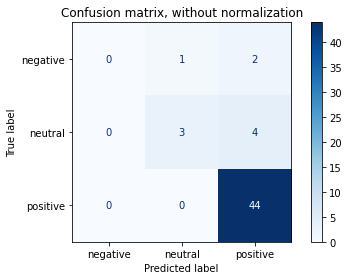

Normalized confusion matrix
[[0.         0.33333333 0.66666667]
 [0.         0.42857143 0.57142857]
 [0.         0.         1.        ]]


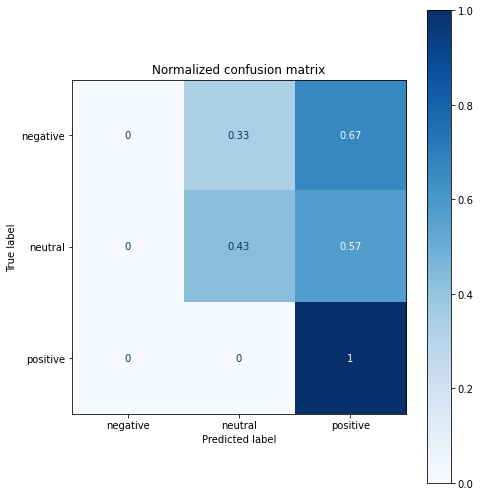

In [25]:
random = RandomForestClassifier(random_state=42)
# random = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth= 2, max_features= 10, min_samples_leaf= 3, min_samples_split= 2, n_estimators= 300)
random.fit(X_train, y_train)

# モデルの学習結果を評価する
accuracy = random.score(X_test, y_test)    # テストデータで試す
print(f"正答率{accuracy}")
predicted = random.predict(X_test)    # テストデータの分類結果
n_error = (y_test != predicted).sum()    # 正解と分類結果を比較する
print(f"誤った個数：{n_error}")

# 詳しいレポート
print("classification report")
print(metrics.classification_report(y_test, predicted))

#混同行列の作成
class_names = level_names
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(random, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    plt.rcParams["figure.figsize"] = (7, 7)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    plt.tight_layout()
    plt.show()

In [65]:
X_train

,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,accz_var,gyrx_var,...,accx_min,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak
93,10141.540000,-184.433333,-192.446667,47.822500,-51.312500,-76.846667,33391.683400,47667.537222,212748.167156,130751.425994,...,9409,-665,-1220,-1245,-1676,-692,6.842620,100.564106,0.195503,201.417534
124,10108.242500,-162.410000,-817.172500,77.872500,21.973333,-117.532500,8775.453694,1540.780233,32633.979410,2305.352910,...,9741,-320,-1574,-87,-1029,-253,6.256109,41.709268,0.391007,56.975440
63,9785.500833,204.920000,-2886.096667,35.591667,116.154167,-32.452500,27297.739999,68965.643600,187551.063989,169252.301597,...,9176,-403,-3999,-1440,-1993,-659,6.256109,67.526307,0.195503,213.844651
207,10139.630833,-884.865833,809.550833,83.753333,73.259167,-121.015000,25921.689549,15118.559499,107430.987416,67759.044156,...,9680,-1332,-253,-886,-2688,-710,6.060606,50.536743,3.323558,137.776941
103,10141.341667,-392.520000,113.445000,86.080833,112.015000,-49.813333,5944.196597,122838.977933,250025.470308,33332.464299,...,9814,-1097,-1234,-965,-1072,-655,2.346041,33.816654,0.195503,194.847693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,9832.576667,81.060000,-2731.799167,28.189167,-83.122500,-17.901667,29451.049122,20016.564733,215127.273833,94520.066716,...,9037,-328,-3840,-1147,-2950,-342,5.474096,43.845130,1.368524,227.170308
196,10233.665833,443.742500,-585.935000,107.790000,25.400000,-4.042500,33891.680833,31582.537860,308338.495775,148057.322567,...,9690,-181,-2368,-1349,-3047,-810,1.955034,79.814158,0.195503,602.465466
164,4556.835833,1312.050833,-8934.927500,-7.520833,109.288333,16.135833,85096.020549,7029.479916,53969.045577,42207.057899,...,4012,893,-9797,-1238,-2846,-769,8.993157,73.422152,0.391007,298.879029
81,9676.579167,-397.764167,-3307.330000,59.380000,36.810000,-44.388333,7136.483733,40622.538549,38781.347767,56250.972267,...,9466,-718,-3788,-1379,-876,-591,6.842620,15.915635,0.195503,143.316124


# 特徴量選択

In [ ]:
random.feature_importances_

In [44]:
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# sfs1 = SFS(RandomForestClassifier(bootstrap=False, criterion='gini', max_depth= 2, max_features= 1, min_samples_leaf= 10, min_samples_split= 2, n_estimators= 300),
#            k_features=36,   # いくつの特徴量を出力させたいのか
#            forward=True,
#            floating=False,
#            verbose=2,
#            scoring='accuracy', # 'r2' なども選択できる。
#            cv=loo)

sfs1 = SFS(RandomForestClassifier(),
           k_features=28,   # いくつの特徴量を出力させたいのか
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy', # 'r2' なども選択できる。
           cv=loo)

sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:  1.7min finished

[2021-01-20 03:01:46] Features: 1/28 -- score: 0.6578947368421053[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  1.8min finished

[2021-01-20 03:03:32] Features: 2/28 -- score: 0.7631578947368421[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:  1.5min finished

[2021-01-20 03:05:04] Features: 3/28 -- score: 0.8157894736842105[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [29]:
sfs1.k_feature_idx_

(0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27)

In [30]:
sfs1.k_feature_names_

('accx_mean',
 'accy_mean',
 'accz_mean',
 'gyrx_mean',
 'gyry_mean',
 'gyrz_mean',
 'accx_var',
 'accy_var',
 'accz_var',
 'gyrx_var',
 'gyry_var',
 'gyrz_var',
 'accx_max',
 'accy_max',
 'accz_max',
 'gyrx_max',
 'gyry_max',
 'gyrz_max',
 'accx_min',
 'accy_min',
 'accz_min',
 'gyrx_min',
 'gyry_min',
 'gyrz_min',
 'accn_max_fq',
 'accn_max_peak',
 'gyrn_max_fq',
 'gyrn_max_peak')

In [45]:
pd.DataFrame.from_dict(sfs1.get_metric_dict())

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
feature_idx,"(3,)","(2, 3)","(2, 3, 4)","(2, 3, 4, 8)","(2, 3, 4, 8, 23)","(2, 3, 4, 8, 15, 23)","(2, 3, 4, 8, 15, 23, 24)","(0, 2, 3, 4, 8, 15, 23, 24)","(0, 1, 2, 3, 4, 8, 15, 23, 24)","(0, 1, 2, 3, 4, 6, 8, 15, 23, 24)",...,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15,...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15,...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
cv_scores,"[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,"[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, ..."
avg_score,0.657895,0.763158,0.815789,0.842105,0.842105,0.868421,0.842105,0.842105,0.842105,0.842105,...,0.842105,0.842105,0.815789,0.842105,0.815789,0.815789,0.842105,0.815789,0.789474,0.763158
feature_names,"(gyrx_mean,)","(accz_mean, gyrx_mean)","(accz_mean, gyrx_mean, gyry_mean)","(accz_mean, gyrx_mean, gyry_mean, accz_var)","(accz_mean, gyrx_mean, gyry_mean, accz_var, gy...","(accz_mean, gyrx_mean, gyry_mean, accz_var, gy...","(accz_mean, gyrx_mean, gyry_mean, accz_var, gy...","(accx_mean, accz_mean, gyrx_mean, gyry_mean, a...","(accx_mean, accy_mean, accz_mean, gyrx_mean, g...","(accx_mean, accy_mean, accz_mean, gyrx_mean, g...",...,"(accx_mean, accy_mean, accz_mean, gyrx_mean, g...","(accx_mean, accy_mean, accz_mean, gyrx_mean, g...","(accx_mean, accy_mean, accz_mean, gyrx_mean, g...","(accx_mean, accy_mean, accz_mean, gyrx_mean, g...","(accx_mean, accy_mean, accz_mean, gyrx_mean, g...","(accx_mean, accy_mean, accz_mean, gyrx_mean, g...","(accx_mean, accy_mean, accz_mean, gyrx_mean, g...","(accx_mean, accy_mean, accz_mean, gyrx_mean, g...","(accx_mean, accy_mean, accz_mean, gyrx_mean, g...","(accx_mean, accy_mean, accz_mean, gyrx_mean, g..."
ci_bound,0.157889,0.141492,0.129015,0.121356,0.121356,0.1125,0.121356,0.121356,0.121356,0.121356,...,0.121356,0.121356,0.129015,0.121356,0.129015,0.129015,0.121356,0.129015,0.13568,0.141492
std_dev,0.474415,0.425145,0.387656,0.364642,0.364642,0.338032,0.364642,0.364642,0.364642,0.364642,...,0.364642,0.364642,0.387656,0.364642,0.387656,0.387656,0.364642,0.387656,0.407682,0.425145
std_err,0.0779933,0.0698933,0.0637302,0.0599468,0.0599468,0.0555722,0.0599468,0.0599468,0.0599468,0.0599468,...,0.0599468,0.0599468,0.0637302,0.0599468,0.0637302,0.0637302,0.0599468,0.0637302,0.0670226,0.0698933


In [32]:
sfs1.get_metric_dict()

{1: {'feature_idx': (3,),
  'cv_scores': array([0.61538462, 0.53846154, 0.58333333]),
  'avg_score': 0.5790598290598291,
  'feature_names': ('gyrx_mean',),
  'ci_bound': 0.07099511725495224,
  'std_dev': 0.031548767222720965,
  'std_err': 0.022308347241261878},
 2: {'feature_idx': (3, 18),
  'cv_scores': array([0.76923077, 0.76923077, 0.75      ]),
  'avg_score': 0.7628205128205128,
  'feature_names': ('gyrx_mean', 'accx_min'),
  'ci_bound': 0.02040029682874532,
  'std_dev': 0.009065471553673706,
  'std_err': 0.006410256410256425},
 3: {'feature_idx': (1, 3, 18),
  'cv_scores': array([0.76923077, 0.76923077, 0.83333333]),
  'avg_score': 0.7905982905982906,
  'feature_names': ('accy_mean', 'gyrx_mean', 'accx_min'),
  'ci_bound': 0.06800098942915091,
  'std_dev': 0.03021823851224562,
  'std_err': 0.021367521367521364},
 4: {'feature_idx': (1, 3, 14, 18),
  'cv_scores': array([0.76923077, 0.76923077, 0.83333333]),
  'avg_score': 0.7905982905982906,
  'feature_names': ('accy_mean', 'gyrx_m

In [59]:
iris = datasets.load_iris()

In [60]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [68]:
cancer = load_breast_cancer()

In [70]:
cancer.names

AttributeError: names